In [18]:
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import requests

In [2]:
url = "https://musicalics.com/en/composers_alphabet"

result = requests.get(url)
soup = bs(result.text, 'html.parser')

In [30]:
composers = []
composer_id = 1

for x in soup.find_all("div", class_="views-row"[:9]):
    try:
        lastname = x.find("span", class_="views-field views-field-field-name").text.lstrip().rstrip().split(" ")

        firstname = x.find("span", class_="views-field views-field-field-firstname").text.lstrip().rstrip().split(" ")

        # Date of birth
        if x.find("span", class_="views-field views-field-field-date-of-birth").text[2:].rstrip() == "?":
            dob = ""
        else:
            dob = x.find("span", class_="views-field views-field-field-date-of-birth").text[2:].rstrip()

        composers.append({
            "first_name": firstname[0], 
            "last_name": lastname[-1],
            "dob": dob,
            "composer_id": composer_id
        })
    except AttributeError as e:
        print(e)

    composer_id += 1

'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute 'text'
'NoneType' object has no attribute

In [32]:
composers_df = pd.DataFrame(composers)
composers_df.head()
# composers_df[dob].astype(int)
# composers_df.dtypes

,composer_id,dob,first_name,last_name
0,1,1817,Mary,Beckett
1,2,1485,Nikolaus,Decius
2,3,1933,Jian,Ke
3,4,1600,Nicolaus,Kempis
4,5,1635,Johannes,Kempis


In [39]:
dob_group = composers_df.groupby(["dob"]).count()
dob_group.head()

,composer_id,first_name,last_name
dob,,,
,32,32,32
1079,4,4,4
1480,1,1,1
1485,1,1,1
1500,1,1,1


<BarContainer object of 128 artists>

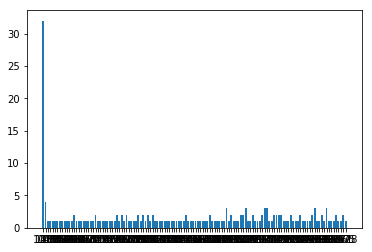

In [41]:
plt.bar(dob_group.index, dob_group["composer_id"])

In [6]:
women_url = "https://musicalics.com/en/female-composers"

result = requests.get(women_url)
broth = bs(result.text, 'html.parser')

In [ ]:
women = []

# Women
for x in broth.find_all("span", class_="timeline-text"):
    fullname = x.text.rstrip().split(" ")
    w_first = fullname[0]
    w_last = fullname[-1]

    women.append({
        "first_name": w_first,
        "last_name": w_last
    })

pp.pprint(women)